In [2]:
import pandas as pd

#Reading in all subjects as seperated dataframs
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
data = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name=sheets, skiprows=8)


def rename_columns(df):
    # Changeing the column names
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt_A_F",
        "Flickor_A_F",
        "Pojkar_A_F",
        "Totalt_A_E",
        "Flickor_A_E",
        "Pojkar_A_E",
        "Totalt_poäng",
        "Flickor_poäng",
        "Pojkar_poäng",
    ]
    return df

# Change colmunnames for each subject
for sheet, df in data.items():
    data[sheet] = rename_columns(df)

for sheet, df in data.items():
    print(f"\n{sheet} - första raderna: ")
    print(df.head())



Engelska - första raderna: 
   Plats    Huvudman  Totalt_A_F  Flickor_A_F  Pojkar_A_F  Totalt_A_E  \
0  Riket    Samtliga      106941        51864       55077        97.0   
1  Riket    Kommunal       84310        40675       43635        96.6   
2  Riket     Enskild       22582        11165       11417        98.7   
3  Riket  Skolverket          49           24          25       100.0   

   Flickor_A_E  Pojkar_A_E  Totalt_poäng  Flickor_poäng  Pojkar_poäng  
0         97.1        97.0          15.7           15.8          15.7  
1         96.6        96.6          15.4           15.5          15.4  
2         98.8        98.7          16.9           17.0          16.8  
3        100.0       100.0          18.5           18.9          18.2  

Matematik - första raderna: 
   Plats    Huvudman  Totalt_A_F  Flickor_A_F  Pojkar_A_F Totalt_A_E  \
0  Riket    Samtliga      106766        51548       55218       89.1   
1  Riket    Kommunal       84163        40386       43777       88.1   

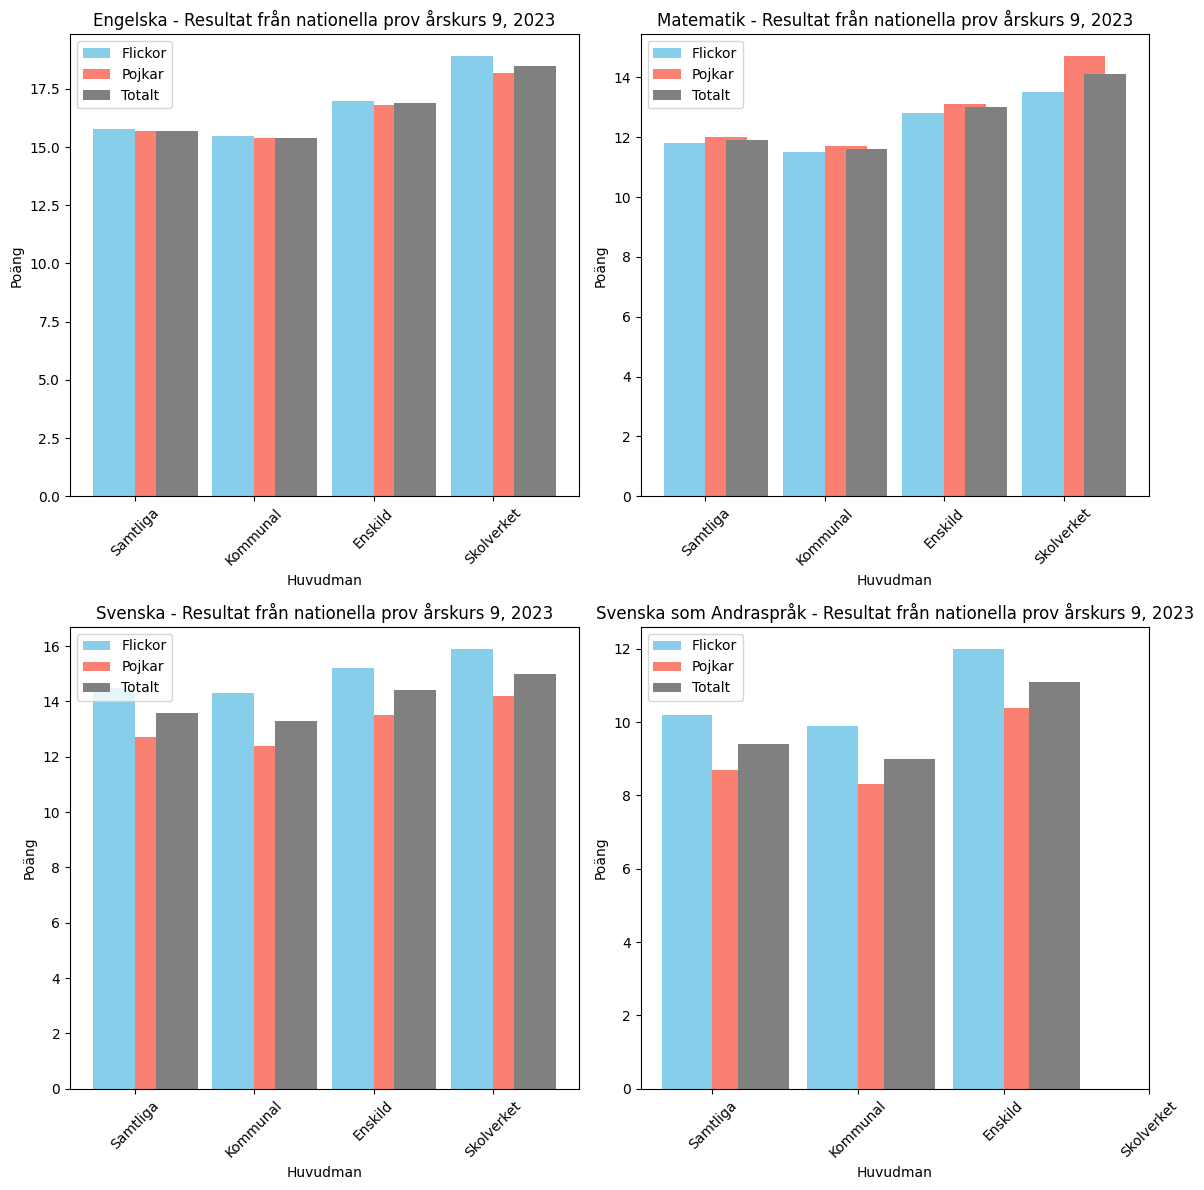

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Function to create bar chart
def plot_scores(df, ax, subject_name):
    bar_width = 0.35 # the bar witdh
    index = np.arange(len(df)) #huvudman index
    
    # Convert "Total_poäng" to numeric values if it isn't already
    df['Totalt_poäng'] = pd.to_numeric(df['Totalt_poäng'], errors='coerce')
    df['Flickor_poäng'] = pd.to_numeric(df['Flickor_poäng'], errors='coerce')
    df['Pojkar_poäng'] = pd.to_numeric(df['Pojkar_poäng'], errors='coerce')

    ax.bar(index - bar_width / 2, df['Flickor_poäng'], bar_width, label='Flickor', color="skyblue")
    ax.bar(index + bar_width / 2, df['Pojkar_poäng'], bar_width, label='Pojkar', color="salmon")
    ax.bar(index + bar_width, df['Totalt_poäng'], bar_width, label='Totalt', color="gray")

    ax.set_title(f'{subject_name} - Resultat från nationella prov årskurs 9, 2023')
    ax.set_xlabel('Huvudman')
    ax.set_ylabel('Poäng')
    ax.set_xticks(index)
    ax.set_xticklabels(df['Huvudman'], rotation=45)
    ax.legend()


#Create fig with subplots
fig, axs = plt.subplots(2, 2, figsize=(12,12))

# Draw bar chart for each subject
plot_scores(data['Engelska'], axs[0, 0], "Engelska")
plot_scores(data['Matematik'], axs[0, 1], "Matematik")
plot_scores(data['Svenska'], axs[1, 0], "Svenska")
plot_scores(data['Svenska som andraspråk'], axs[1,1], "Svenska som Andraspråk")

# Adjust layout to avoid overlap
plt.tight_layout() 

# Save the plot as a PNG file
output_folder = "Visualiseringar/"
fig.savefig("resultat_nationella_prov_årskurs9_2023.png")

# Show the plot
plt.show()





